# Eigenfaces
## by Oliver Ochs
## This project is able to recognize a person’s face by comparing facial images to that of a known person. The algorithm projects the image onto a “face space” composed of a complete basis of eigenfaces.

In [1]:
#imports
import numpy as np
import os
import matplotlib.pyplot as plt
import math
from PIL import Image
from glob import glob
import random
from sklearn.decomposition.pca import PCA

# #unzipping dataset(only needs to be ran once)

# import zipfile as zf
# files = zf.ZipFile("dataset.zip", 'r')
# files.extractall('')
# files.close()

# convert to png(only needs to be ran once)
# files = glob('dataset/s*/*.pgm')
# count = 0
# for f in files:
#     new_f = f[:-3]+'png'
#     # !convert $f $new_f
#     Image.open(f).save('' + new_f)
#     count += 1
#     if count % 100 == 0:
#         print('%d, %s, %s'%(count, f, new_f))
# print('number of files is %d'%len(files))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.decomposition.pca module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.decomposition. Anything that cannot be imported from sklearn.decomposition is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# This image_grid_ function reshapes the array into its original dimensions and plots the image in a grid.
# The col parameter allows you to specify the number of images in each row.
def image_grid(D,H,W,cols=10,scale=1):
    """ display a grid of images
        H,W: Height and width of the images
        cols: number of columns = number of images in each row
        scale: 1 to fill screen
    """
    n = np.shape(D)[0]
    rows = int(math.ceil((n+0.0)/cols))
    fig = plt.figure(1,figsize=[scale*20.0/H*W,scale*20.0/cols*rows],dpi=300)
    for i in range(n):
        plt.subplot(rows,cols,i+1)
        fig=plt.imshow(np.reshape(D[i,:],[H,W]), cmap = plt.get_cmap("gray"))
        plt.axis('off')

## Generating five random numbers (e.g., 2, 5, 7, 9, 10) and using them to select five images (i.e., 2nd, 5th, 7th, 9th, and 10thimages) from each subject. Using those images to calculate the eigenfaces.

In [3]:
randomlist = random.sample(range(1, 10), 5)
files = glob('dataset/s*/*' + str(randomlist) + '.png')
# open image
im = Image.open(''+files[0]).convert("L")
# get original dimensions
H,W = np.shape(im)
print('shape=%d x %d => %d pixels'%(H,W, H*W))

im_number = len(files)
# fill array with rows as image
# and columns as pixels
arr = np.zeros([im_number,H*W])

for i in range(im_number):
    im = Image.open(''+files[i]).convert("L")
    arr[i,:] = np.reshape(np.asarray(im),[1,H*W])

#image_grid(arr,H,W)

shape=112 x 92 => 10304 pixels


In [4]:
# the mean_image
mean_image = np.mean(arr, axis=0)
# centering the data (subtract mean face)
arr_norm = np.zeros([im_number, H*W])
arr_norm = arr - mean_image

# PCA
pca = PCA()
pca.fit(arr_norm)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

## Plotting the eigenfaces.

In [7]:
# eigenfaces
eigenfaces = pca.components_
image_grid(eigenfaces[:30,:], H, W, cols=3)

In [6]:
# eigenfaces
eigenfaces = pca.components_
image_grid(eigenfaces[30:60,:], H, W, cols=3)

In [8]:
# eigenfaces
eigenfaces = pca.components_
image_grid(eigenfaces[60:90,:], H, W, cols=3)

## Plotting the eigenvalues out and selecting the cut down value by the figure; keeping only those principal components preserving 90% or more variance of the dataset

(200,)


Text(0.5, 0, 'Principal Component Number')

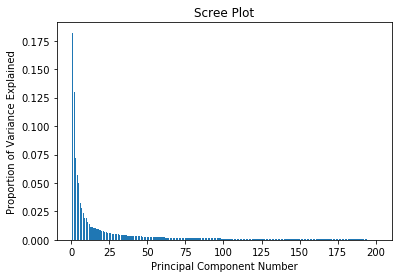

In [9]:
#scree plot
pve = pca.explained_variance_ratio_
print(pve.shape)
plt.bar(x = range(1, len(pve)+1), height=pve)
plt.title("Scree Plot")
plt.ylabel("Proportion of Variance Explained")
plt.xlabel("Principal Component Number")

In [10]:
#components preserving 90% or more variance
a = pca.explained_variance_ratio_
b = []
for ele in a:
    if ele >= .1:
        b.append(ele)
print("Number of dropped components: " + str(len(a)-len(b)))
c = pca.components_
c.sort()
d = c[:len(b) - len(a)]
print(d)

Number of dropped components: 198
[[-0.01539991 -0.01505683 -0.0148706  ...  0.02743768  0.02750911
   0.02752297]
 [-0.02481883 -0.02456233 -0.02455646 ...  0.01464836  0.01488028
   0.01489186]]


## Using kNN (k=1) to perform classification. Here, the dataset is randomly split into training and test (80%-20%).

In [11]:
import pandas as pd

files = glob('dataset/s*/*.png')
# open image
im = Image.open(''+files[0]).convert("L")
# get original dimensions
H,W = np.shape(im)
print('shape=%d x %d => %d pixels'%(H,W, H*W))

im_number = len(files)
# fill array with rows as image
# and columns as pixels
arr = np.zeros([im_number,H*W])

for i in range(im_number):
    im = Image.open(''+files[i]).convert("L")
    arr[i,:] = np.reshape(np.asarray(im),[1,H*W])


shape=112 x 92 => 10304 pixels


In [12]:
# the mean_image
mean_image = np.mean(arr, axis=0)
# centering the data (subtract mean face)
arr_norm = np.zeros([im_number, H*W])
arr_norm = arr - mean_image

In [13]:
from sklearn.model_selection import train_test_split

files = glob('dataset/s*/*.png')
subjects = os.listdir('dataset')
subjects = subjects[3:] #added because of hidden files within notebook
names = []
for i in subjects:
    names += 10 * [i]
X = arr_norm
y = names
y = np.asarray(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [14]:
n_components = 50
pca = PCA(n_components=n_components).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

## Reported combined classification accuracy, and per subject classification accuracy on the test dataset.

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score

# #knn
k = KNeighborsClassifier(n_neighbors=1)
k.fit(X_train_pca, y_train)
y_pred = k.predict(X_test_pca)
print("kNN (k=1)")
print(metrics.classification_report(y_test, y_pred))

kNN (k=1)
              precision    recall  f1-score   support

          s1       1.00      1.00      1.00         3
         s10       1.00      1.00      1.00         1
         s11       1.00      1.00      1.00         2
         s12       1.00      1.00      1.00         4
         s13       1.00      1.00      1.00         3
         s14       1.00      1.00      1.00         3
         s15       0.00      0.00      0.00         0
         s16       1.00      0.83      0.91         6
         s17       1.00      1.00      1.00         2
         s18       1.00      1.00      1.00         2
         s19       1.00      1.00      1.00         2
          s2       1.00      1.00      1.00         3
         s20       1.00      1.00      1.00         2
         s21       1.00      1.00      1.00         1
         s22       1.00      1.00      1.00         3
         s23       1.00      0.50      0.67         2
         s25       1.00      1.00      1.00         3
         s26     

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Using 5-fold cross validation to do perform classification.

In [16]:
from sklearn.model_selection import KFold
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
files = glob('dataset/s*/*.png')
subjects = os.listdir('dataset')
subjects = subjects[3:]
names = []
for i in subjects:
    names += 10 * [i]
X = arr_norm
y = names
y = np.asarray(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

n_components = 50
pca = PCA(n_components=n_components).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# #knn
k = KNeighborsClassifier(n_neighbors=1)

count = 0
kf = KFold(n_splits=5, random_state=None, shuffle=False)
for train, test in kf.split(X_train_pca, y_train):
    new_model = k.fit(X_train_pca[train], y_train[train])
    y_pred = new_model.predict(X_test_pca)
    count += 1
    print('iteration:' + str(count) + ' accuracy:'+ str(accuracy_score(y_test,y_pred)))

iteration:1 accuracy:0.8875
iteration:2 accuracy:0.9375
iteration:3 accuracy:0.925
iteration:4 accuracy:0.9625
iteration:5 accuracy:0.9375


## Repeat of above but after a resize of the images from 92x112 to 46x56.

In [17]:
files = glob('revizeddataset/s*/*.png')
# open image
im = Image.open(''+files[0]).convert("L")

# for infile in glob("dataset/s*/*.png"):
#     file, ext = os.path.splitext(infile)
#     resized = Image.open(infile)
#     resized = resized.resize((56,46), Image.ANTIALIAS)
#     resized.save("revized" + file + ".png", "PNG")
    
# get original dimensions
H,W = np.shape(im)
print('shape=%d x %d => %d pixels'%(H,W, H*W))

im_number = len(files)
# fill array with rows as image
# and columns as pixels
arr = np.zeros([im_number,H*W])

for i in range(im_number):
    im = Image.open(''+files[i]).convert("L")
    arr[i,:] = np.reshape(np.asarray(im),[1,H*W])


shape=46 x 56 => 2576 pixels


In [18]:
# the mean_image
mean_image = np.mean(arr, axis=0)

# centering the data (subtract mean face)
arr_norm = np.zeros([im_number, H*W])
arr_norm = arr - mean_image

# PCA
pca = PCA()
pca.fit(arr_norm)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [19]:
# eigenfaces
eigenfaces = pca.components_
image_grid(eigenfaces[:30,:], H, W, cols=3)

In [20]:
# eigenfaces
eigenfaces = pca.components_
image_grid(eigenfaces[30:60,:], H, W, cols=3)

In [21]:
# eigenfaces
eigenfaces = pca.components_
image_grid(eigenfaces[60:90,:], H, W, cols=3)

In [22]:
#components preserving 90% or more variance
a = pca.explained_variance_ratio_
b = []
for ele in a:
    if ele >= .1:
        b.append(ele)
print("Number of dropped components: " + str(len(a)-len(b)))
c = pca.components_
c.sort()
d = c[:len(b) - len(a)]
print(d)

Number of dropped components: 398
[[-0.03165055 -0.02973693 -0.02914837 ...  0.05283531  0.05293897
   0.05330236]
 [-0.04666251 -0.04608438 -0.04588297 ...  0.02819028  0.0283439
   0.02845718]]


In [23]:
files = glob('revizeddataset/s*/*.png')
subjects = os.listdir('revizeddataset')
subjects = subjects[2:] #added because of hidden files within notebook
names = []
for i in subjects:
    names += 10 * [i]
X = arr_norm
y = names
y = np.asarray(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

n_components = 50
pca = PCA(n_components=n_components).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# #knn
k = KNeighborsClassifier(n_neighbors=1)
print("kNN (k=1)")
print(metrics.classification_report(y_test, y_pred))

count = 0
kf = KFold(n_splits=5, random_state=None, shuffle=False)
for train, test in kf.split(X_train_pca, y_train):
    new_model = k.fit(X_train_pca[train], y_train[train])
    y_pred = new_model.predict(X_test_pca)
    count += 1
    print('iteration:' + str(count) + ' accuracy:'+ str(accuracy_score(y_test,y_pred)))

kNN (k=1)
              precision    recall  f1-score   support

          s1       1.00      1.00      1.00         3
         s10       1.00      1.00      1.00         1
         s11       1.00      1.00      1.00         2
         s12       1.00      1.00      1.00         4
         s13       1.00      1.00      1.00         3
         s14       1.00      1.00      1.00         3
         s15       0.00      0.00      0.00         0
         s16       1.00      0.83      0.91         6
         s17       1.00      1.00      1.00         2
         s18       1.00      1.00      1.00         2
         s19       1.00      1.00      1.00         2
          s2       1.00      1.00      1.00         3
         s20       1.00      0.50      0.67         2
         s21       1.00      1.00      1.00         1
         s22       1.00      1.00      1.00         3
         s23       1.00      0.50      0.67         2
         s25       1.00      1.00      1.00         3
         s26     

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#  Comparison of the new results to the results using un-resized images.
Accuracy between the two models is almost the same. If we can resize the images to 46,56 and get similar results it is much more appealing to take the resizing approach due to the speed and amount of data used.